# DSC 540 Term Project
# Previewing Data about Botted Views In KPOP
# Rahul Rajeev

In [302]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import regex as re
import sqlite3
import seaborn as sns

## **Milestone 2: Reading Raw File**

In [47]:
# solo idols
kpop_idols = pd.read_csv('kpop_idols.csv')
kpop_idols.head()

,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Birthplace,Other Group,Gender
0,A.M,Seong Hyunwoo,성현우,에이엠,12/31/1996,Limitless,South Korea,NaN,NaN,M
1,Ace,Jang Wooyoung,장우영,에이스,8/28/1992,VAV,South Korea,NaN,NaN,M
2,Aeji,Kwon Aeji,권애지,애지,10/25/1999,Hashtag,South Korea,Daegu,NaN,F
3,AhIn,Lee Ahin,이아인,아인,9/27/1999,MOMOLAND,South Korea,Wonju,NaN,F
4,Ahra,Go Ahra,고아라,아라,2/21/2001,Favorite,South Korea,Yeosu,NaN,F


In [48]:
# boy groups
boy_groups = pd.read_csv('kpop_idols_boy_groups.csv')
boy_groups.head()

,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Fanclub Name,Active
0,100%,NaN,백퍼센트,2012-09-18,TOP Media,4,7,Perfection,Yes
1,14U,NaN,원포유,2017-04-17,BG,14,14,NaN,Yes
2,1the9,NaN,원더나인,2019-02-09,MBK,9,9,NaN,Yes
3,24K,NaN,투포케이,2012-09-06,Choeun,8,6,24U,Yes
4,2AM,NaN,투에이엠,2008-06-21,"JYP, Big Hit",4,4,I Am,No


In [49]:
# girl groups
girl_groups = pd.read_csv('kpop_idols_girl_groups.csv')
girl_groups.head()

,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Fanclub Name,Active
0,(G)I-DLE,NaN,(여자)아이들,2018-05-02,Cube,6,6,NaN,Yes
1,15&,NaN,피프틴앤드,2012-10-05,JYP,2,2,NaN,No
2,2EYES,NaN,투아이즈,2013-07-20,SidusHQ,4,5,NaN,No
3,2NE1,NaN,투애니원,2009-05-06,YG,4,4,Blackjack,No
4,3YE,NaN,써드아이,2019-05-21,GH,3,3,NaN,Yes


In [50]:
# music video
music_videos = pd.read_csv('kpop_music_videos.csv')
music_videos.head()

,Date,Artist,Song Name,Korean Name,Director,Video,Type,Release
0,5/22/2020,Suga,Daechwita,대취타,NaN,https://youtu.be/qGjAWJ2zWWI,Boy Solo,Major
1,5/21/2020,Yubin,yaya (Me Time),넵넵,NaN,https://youtu.be/BJD0arHF_5c,Girl Solo,Major
2,5/21/2020,OnlyOneOf,Angel (prod. GRAY),NaN,NaN,https://youtu.be/vVTo8p72FxQ,Boy,Major
3,5/20/2020,Ryu Sujeong,Tiger Eyes,NaN,NaN,https://youtu.be/aE6curPGQRY,Girl Solo,Major
4,5/20/2020,Crush,Mayday feat. Joy (Red Velvet),자나깨나,NaN,https://youtu.be/29ycT6fA-Rs,Boy Solo,Major


**Transformation 1:** Renaming columns of idols, boy groups, and girl groups (name to artist) so that it is easier to combine the videos and individual files together.

In [51]:
# idols
idols_artist = kpop_idols.rename(columns={'Stage Name': 'Artist'})

In [52]:
bgroup_artist = boy_groups.rename(columns = {'Name': 'Artist'})

In [53]:
ggroup_artist = girl_groups.rename(columns = {'Name': 'Artist'})

**Transformation 2:** Subsetting video file by being a solo video or a group video. I wouldn't necessarily call this a big transformation, but it help organize my thought process and overall combine the data sources better.

In [54]:
# solo videos
solos = music_videos[music_videos['Type'].str.contains("Solo")]
solos.head()

,Date,Artist,Song Name,Korean Name,Director,Video,Type,Release
0,5/22/2020,Suga,Daechwita,대취타,NaN,https://youtu.be/qGjAWJ2zWWI,Boy Solo,Major
1,5/21/2020,Yubin,yaya (Me Time),넵넵,NaN,https://youtu.be/BJD0arHF_5c,Girl Solo,Major
3,5/20/2020,Ryu Sujeong,Tiger Eyes,NaN,NaN,https://youtu.be/aE6curPGQRY,Girl Solo,Major
4,5/20/2020,Crush,Mayday feat. Joy (Red Velvet),자나깨나,NaN,https://youtu.be/29ycT6fA-Rs,Boy Solo,Major
19,5/7/2020,Moon Jongup,Headache feat. Yunhway,개화,NaN,https://youtu.be/KTAZ7I8RylM,Boy Solo,Major


In [55]:
# boy group videos
bgroup = music_videos[~music_videos['Type'].str.contains('|'.join(['Solo', 'Girl']))]
bgroup.head()

,Date,Artist,Song Name,Korean Name,Director,Video,Type,Release
2,5/21/2020,OnlyOneOf,Angel (prod. GRAY),NaN,NaN,https://youtu.be/vVTo8p72FxQ,Boy,Major
5,5/19/2020,NCT 127,Punch,NaN,NaN,https://youtu.be/U08OSl3V4po,Boy,Major
8,5/18/2020,N.Flying,Amnesia,NaN,NaN,https://youtu.be/UcxNeKzdDN4,Boy,Japanese
9,5/18/2020,TXT,Can't You See Me?,"세계가 불타버린 밤, 우린...",NaN,https://youtu.be/cMFHUTJ13Ys,Boy,Major
12,5/14/2020,UNVS,Give You Up,NaN,NaN,https://youtu.be/AhHkUqlELvU,Boy,Major


In [56]:
# girl group videos
ggroup = music_videos[~music_videos['Type'].str.contains('|'.join(['Solo', 'Boy', 'Co-Ed']))]
ggroup.head()

,Date,Artist,Song Name,Korean Name,Director,Video,Type,Release
6,5/19/2020,SECRET NUMBER,Who Dis?,NaN,NaN,https://youtu.be/mkYwq_CKpyw,Girl,Major
7,5/18/2020,REDSQUARE,ColorFull,NaN,NaN,https://youtu.be/we1wqjcsYBU,Girl,Major
10,5/15/2020,woo!ah!,woo!ah!,우아,NaN,https://youtu.be/FBcuYNTmYdM,Girl,Major
11,5/15/2020,Oh My Girl,Dolphin,NaN,NaN,https://youtu.be/oaRTMjLdiDw,Girl,Special
13,5/13/2020,Busters,Paeonia,피오니아,NaN,https://youtu.be/ocFqqAMooSk,Girl,Major


**Transformation 3:** Left join the dataframes. I join the subsets with the artist information on a left join to the music video file for additional context.

In [57]:
# solos videos and artist
solo_videos = pd.merge(solos, idols_artist, on = 'Artist', how = 'left')
solo_videos.head()

,Date,Artist,Song Name,Korean Name_x,Director,Video,Type,Release,Full Name,Korean Name_y,K. Stage Name,Date of Birth,Group,Country,Birthplace,Other Group,Gender
0,5/22/2020,Suga,Daechwita,대취타,NaN,https://youtu.be/qGjAWJ2zWWI,Boy Solo,Major,Min Yoongi,민윤기,슈가,3/9/1993,BTS,South Korea,Daegu,NaN,M
1,5/21/2020,Yubin,yaya (Me Time),넵넵,NaN,https://youtu.be/BJD0arHF_5c,Girl Solo,Major,Kim Yubin,김유빈,유빈,10/4/1988,Wonder Girls,South Korea,Gwangju,NaN,F
2,5/20/2020,Ryu Sujeong,Tiger Eyes,NaN,NaN,https://youtu.be/aE6curPGQRY,Girl Solo,Major,Ryu Sujeong,류수정,수정,11/19/1997,Lovelyz,South Korea,Daejeon,NaN,F
3,5/20/2020,Crush,Mayday feat. Joy (Red Velvet),자나깨나,NaN,https://youtu.be/29ycT6fA-Rs,Boy Solo,Major,Shin-Hyoseob,NaN,NaN,5/3/1992,NaN,South Korea,Seoul,NaN,M
4,5/7/2020,Moon Jongup,Headache feat. Yunhway,개화,NaN,https://youtu.be/KTAZ7I8RylM,Boy Solo,Major,Moon Jongup,문종업,종업,2/6/1995,B.A.P,South Korea,Seoul,NaN,M


In [58]:
# boy group videos and artists
bgroup_videos = pd.merge(bgroup, bgroup_artist, on = 'Artist', how = 'left')
bgroup_videos.head()

,Date,Artist,Song Name,Korean Name_x,Director,Video,Type,Release,Short,Korean Name_y,Debut,Company,Members,Orig. Memb.,Fanclub Name,Active
0,5/21/2020,OnlyOneOf,Angel (prod. GRAY),NaN,NaN,https://youtu.be/vVTo8p72FxQ,Boy,Major,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5/19/2020,NCT 127,Punch,NaN,NaN,https://youtu.be/U08OSl3V4po,Boy,Major,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5/18/2020,N.Flying,Amnesia,NaN,NaN,https://youtu.be/UcxNeKzdDN4,Boy,Japanese,NaN,엔플라잉,2015-05-20,FNC,4.0,4.0,N.Fia,Yes
3,5/18/2020,TXT,Can't You See Me?,"세계가 불타버린 밤, 우린...",NaN,https://youtu.be/cMFHUTJ13Ys,Boy,Major,NaN,투모로우바이투게더,2019-03-04,Big Hit,5.0,5.0,NaN,Yes
4,5/14/2020,UNVS,Give You Up,NaN,NaN,https://youtu.be/AhHkUqlELvU,Boy,Major,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
# girl group videos and artists
ggroup_videos = pd.merge(ggroup, ggroup_artist, on = 'Artist', how = 'left')
ggroup_videos.head()

,Date,Artist,Song Name,Korean Name_x,Director,Video,Type,Release,Short,Korean Name_y,Debut,Company,Members,Orig. Memb.,Fanclub Name,Active
0,5/19/2020,SECRET NUMBER,Who Dis?,NaN,NaN,https://youtu.be/mkYwq_CKpyw,Girl,Major,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5/18/2020,REDSQUARE,ColorFull,NaN,NaN,https://youtu.be/we1wqjcsYBU,Girl,Major,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5/15/2020,woo!ah!,woo!ah!,우아,NaN,https://youtu.be/FBcuYNTmYdM,Girl,Major,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5/15/2020,Oh My Girl,Dolphin,NaN,NaN,https://youtu.be/oaRTMjLdiDw,Girl,Special,OHMG,오마이걸,2015-04-21,WM,7.0,8.0,Miracle,Yes
4,5/13/2020,Busters,Paeonia,피오니아,NaN,https://youtu.be/ocFqqAMooSk,Girl,Major,NaN,버스터즈,2017-11-27,JTG,5.0,5.0,Bu-Chu,Yes


**Transformation 4:** Adding empty columns to finally stack the dataframes. Some columns are filled and others are left empty because there isn't enough information provided in the CSV.

In [60]:
# columns from the other dataframes that should be added to the ones that need them
solos_columns_add = ['Debut', 'Company', 'Fanclub Name', 'Active']
extra_columns_add = ['Members', 'Orig. Memb.']
group_columns_add = ['Date of Birth', 'Group', 'Country','Birthplace', 'Gender', 'Other Group', 'Gender']

In [61]:
# adding empty or valued columns for solo videos
for newcol in solos_columns_add:
    solo_videos[newcol]= 'NaN'
for col in extra_columns_add:
    solo_videos[col]= 1

In [62]:
solo_videos.head()

,Date,Artist,Song Name,Korean Name_x,Director,Video,Type,Release,Full Name,Korean Name_y,...,Country,Birthplace,Other Group,Gender,Debut,Company,Fanclub Name,Active,Members,Orig. Memb.
0,5/22/2020,Suga,Daechwita,대취타,NaN,https://youtu.be/qGjAWJ2zWWI,Boy Solo,Major,Min Yoongi,민윤기,...,South Korea,Daegu,NaN,M,NaN,NaN,NaN,NaN,1,1
1,5/21/2020,Yubin,yaya (Me Time),넵넵,NaN,https://youtu.be/BJD0arHF_5c,Girl Solo,Major,Kim Yubin,김유빈,...,South Korea,Gwangju,NaN,F,NaN,NaN,NaN,NaN,1,1
2,5/20/2020,Ryu Sujeong,Tiger Eyes,NaN,NaN,https://youtu.be/aE6curPGQRY,Girl Solo,Major,Ryu Sujeong,류수정,...,South Korea,Daejeon,NaN,F,NaN,NaN,NaN,NaN,1,1
3,5/20/2020,Crush,Mayday feat. Joy (Red Velvet),자나깨나,NaN,https://youtu.be/29ycT6fA-Rs,Boy Solo,Major,Shin-Hyoseob,NaN,...,South Korea,Seoul,NaN,M,NaN,NaN,NaN,NaN,1,1
4,5/7/2020,Moon Jongup,Headache feat. Yunhway,개화,NaN,https://youtu.be/KTAZ7I8RylM,Boy Solo,Major,Moon Jongup,문종업,...,South Korea,Seoul,NaN,M,NaN,NaN,NaN,NaN,1,1


In [63]:
# adding empty columns for bgroup videos
for newcol in group_columns_add:
    bgroup_videos[newcol]= 'NaN'

In [64]:
bgroup_videos.head()

,Date,Artist,Song Name,Korean Name_x,Director,Video,Type,Release,Short,Korean Name_y,...,Members,Orig. Memb.,Fanclub Name,Active,Date of Birth,Group,Country,Birthplace,Gender,Other Group
0,5/21/2020,OnlyOneOf,Angel (prod. GRAY),NaN,NaN,https://youtu.be/vVTo8p72FxQ,Boy,Major,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5/19/2020,NCT 127,Punch,NaN,NaN,https://youtu.be/U08OSl3V4po,Boy,Major,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5/18/2020,N.Flying,Amnesia,NaN,NaN,https://youtu.be/UcxNeKzdDN4,Boy,Japanese,NaN,엔플라잉,...,4.0,4.0,N.Fia,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,5/18/2020,TXT,Can't You See Me?,"세계가 불타버린 밤, 우린...",NaN,https://youtu.be/cMFHUTJ13Ys,Boy,Major,NaN,투모로우바이투게더,...,5.0,5.0,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,5/14/2020,UNVS,Give You Up,NaN,NaN,https://youtu.be/AhHkUqlELvU,Boy,Major,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# adding empty columns for ggroup videos
for newcol in group_columns_add:
    ggroup_videos[newcol]= 'NaN'

In [66]:
ggroup_videos.head()

,Date,Artist,Song Name,Korean Name_x,Director,Video,Type,Release,Short,Korean Name_y,...,Members,Orig. Memb.,Fanclub Name,Active,Date of Birth,Group,Country,Birthplace,Gender,Other Group
0,5/19/2020,SECRET NUMBER,Who Dis?,NaN,NaN,https://youtu.be/mkYwq_CKpyw,Girl,Major,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5/18/2020,REDSQUARE,ColorFull,NaN,NaN,https://youtu.be/we1wqjcsYBU,Girl,Major,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5/15/2020,woo!ah!,woo!ah!,우아,NaN,https://youtu.be/FBcuYNTmYdM,Girl,Major,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5/15/2020,Oh My Girl,Dolphin,NaN,NaN,https://youtu.be/oaRTMjLdiDw,Girl,Special,OHMG,오마이걸,...,7.0,8.0,Miracle,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,5/13/2020,Busters,Paeonia,피오니아,NaN,https://youtu.be/ocFqqAMooSk,Girl,Major,NaN,버스터즈,...,5.0,5.0,Bu-Chu,Yes,NaN,NaN,NaN,NaN,NaN,NaN


**Transformation 5:** Stacking Dataframes by using pandas concat. This was one of the last steps to having a complete dataframe.

In [67]:
# stacking the group videos
final_group_videos = pd.concat([bgroup_videos,ggroup_videos])
final_group_videos.shape

(3558, 22)

In [68]:
final_group_videos.head()

,Date,Artist,Song Name,Korean Name_x,Director,Video,Type,Release,Short,Korean Name_y,...,Members,Orig. Memb.,Fanclub Name,Active,Date of Birth,Group,Country,Birthplace,Gender,Other Group
0,5/21/2020,OnlyOneOf,Angel (prod. GRAY),NaN,NaN,https://youtu.be/vVTo8p72FxQ,Boy,Major,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5/19/2020,NCT 127,Punch,NaN,NaN,https://youtu.be/U08OSl3V4po,Boy,Major,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5/18/2020,N.Flying,Amnesia,NaN,NaN,https://youtu.be/UcxNeKzdDN4,Boy,Japanese,NaN,엔플라잉,...,4.0,4.0,N.Fia,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,5/18/2020,TXT,Can't You See Me?,"세계가 불타버린 밤, 우린...",NaN,https://youtu.be/cMFHUTJ13Ys,Boy,Major,NaN,투모로우바이투게더,...,5.0,5.0,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,5/14/2020,UNVS,Give You Up,NaN,NaN,https://youtu.be/AhHkUqlELvU,Boy,Major,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
# stacking the group and solo videos
final_videos = pd.concat([solo_videos,final_group_videos])
final_videos.shape

(3908, 24)

In [70]:
# final result
final_videos

,Date,Artist,Song Name,Korean Name_x,Director,Video,Type,Release,Full Name,Korean Name_y,...,Birthplace,Other Group,Gender,Debut,Company,Fanclub Name,Active,Members,Orig. Memb.,Short
0,5/22/2020,Suga,Daechwita,대취타,NaN,https://youtu.be/qGjAWJ2zWWI,Boy Solo,Major,Min Yoongi,민윤기,...,Daegu,NaN,M,NaN,NaN,NaN,NaN,1.0,1.0,NaN
1,5/21/2020,Yubin,yaya (Me Time),넵넵,NaN,https://youtu.be/BJD0arHF_5c,Girl Solo,Major,Kim Yubin,김유빈,...,Gwangju,NaN,F,NaN,NaN,NaN,NaN,1.0,1.0,NaN
2,5/20/2020,Ryu Sujeong,Tiger Eyes,NaN,NaN,https://youtu.be/aE6curPGQRY,Girl Solo,Major,Ryu Sujeong,류수정,...,Daejeon,NaN,F,NaN,NaN,NaN,NaN,1.0,1.0,NaN
3,5/20/2020,Crush,Mayday feat. Joy (Red Velvet),자나깨나,NaN,https://youtu.be/29ycT6fA-Rs,Boy Solo,Major,Shin-Hyoseob,NaN,...,Seoul,NaN,M,NaN,NaN,NaN,NaN,1.0,1.0,NaN
4,5/7/2020,Moon Jongup,Headache feat. Yunhway,개화,NaN,https://youtu.be/KTAZ7I8RylM,Boy Solo,Major,Moon Jongup,문종업,...,Seoul,NaN,M,NaN,NaN,NaN,NaN,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,10/4/1999,Sharp,Closer,가까이,NaN,https://youtu.be/2xeuJdOJtAQ,Co-ed,Minor,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1451,1/13/1999,Koyote,Meeting,만남,NaN,https://youtu.be/l_EQUzzpqT8,Co-ed,Major,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1452,1/13/1999,Koyote,Genuine,순정,NaN,https://youtu.be/MHCBoNhQmCk,Co-ed,Major,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1453,1/1/1999,Cool,The Ten Commandments,십계 (십계명),NaN,https://youtu.be/dwjdia_2M5w,Co-ed,Major,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Transformation 6:** Dropping Unnecessary Columns

Korean names can't be used since we used artist name to identify, and this condition follows with K. Stage Name. Short is also just an abbreviated form for kpop groups, so that isn't necessary either. Date of birth isn't necessary, but we will keep it for now. Other group can also be dropped as it doesn't really pertain to the music videos. Gender can be useful when dealing with solos as a subset, debut date and active can help as well, although not in their current form.

TLDR: Dropping Korean Names, K Stage Name, Short, Other Group

In [71]:
# checking columns
final_videos.columns

Index(['Date', 'Artist', 'Song Name', 'Korean Name_x', 'Director', 'Video',
       'Type', 'Release', 'Full Name', 'Korean Name_y', 'K. Stage Name',
       'Date of Birth', 'Group', 'Country', 'Birthplace', 'Other Group',
       'Gender', 'Debut', 'Company', 'Fanclub Name', 'Active', 'Members',
       'Orig. Memb.', 'Short'],
      dtype='object')

In [72]:
# dropping unnecessary columns
final_videos2 = final_videos.drop(['Korean Name_x', 'Korean Name_y', 'K. Stage Name', 'Other Group', 'Short'], axis=1)

In [73]:
# cleaned result
final_videos2

,Date,Artist,Song Name,Director,Video,Type,Release,Full Name,Date of Birth,Group,Country,Birthplace,Gender,Debut,Company,Fanclub Name,Active,Members,Orig. Memb.
0,5/22/2020,Suga,Daechwita,NaN,https://youtu.be/qGjAWJ2zWWI,Boy Solo,Major,Min Yoongi,3/9/1993,BTS,South Korea,Daegu,M,NaN,NaN,NaN,NaN,1.0,1.0
1,5/21/2020,Yubin,yaya (Me Time),NaN,https://youtu.be/BJD0arHF_5c,Girl Solo,Major,Kim Yubin,10/4/1988,Wonder Girls,South Korea,Gwangju,F,NaN,NaN,NaN,NaN,1.0,1.0
2,5/20/2020,Ryu Sujeong,Tiger Eyes,NaN,https://youtu.be/aE6curPGQRY,Girl Solo,Major,Ryu Sujeong,11/19/1997,Lovelyz,South Korea,Daejeon,F,NaN,NaN,NaN,NaN,1.0,1.0
3,5/20/2020,Crush,Mayday feat. Joy (Red Velvet),NaN,https://youtu.be/29ycT6fA-Rs,Boy Solo,Major,Shin-Hyoseob,5/3/1992,NaN,South Korea,Seoul,M,NaN,NaN,NaN,NaN,1.0,1.0
4,5/7/2020,Moon Jongup,Headache feat. Yunhway,NaN,https://youtu.be/KTAZ7I8RylM,Boy Solo,Major,Moon Jongup,2/6/1995,B.A.P,South Korea,Seoul,M,NaN,NaN,NaN,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,10/4/1999,Sharp,Closer,NaN,https://youtu.be/2xeuJdOJtAQ,Co-ed,Minor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1451,1/13/1999,Koyote,Meeting,NaN,https://youtu.be/l_EQUzzpqT8,Co-ed,Major,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1452,1/13/1999,Koyote,Genuine,NaN,https://youtu.be/MHCBoNhQmCk,Co-ed,Major,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1453,1/1/1999,Cool,The Ten Commandments,NaN,https://youtu.be/dwjdia_2M5w,Co-ed,Major,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Transformation 7:** Dropping Rows with Co-ed  and Special Groups. Since the data I'm focused on is mostly solo and solely boy or girl groups, the data from Co-Ed and special groups can be left out. There aren't that many compared to the entire dataset, so I believe it will be fine to get rid of them.

In [74]:
final_videos2['Type'].value_counts()

Boy          1970
Girl         1326
Co-ed         256
Girl Solo     207
Boy Solo      143
Co-Ed           4
Special         2
Name: Type, dtype: int64

In [75]:
final_videos3 = final_videos2[~final_videos2['Type'].str.contains('|'.join(['Co-ed', 'Special', 'Co-Ed']))]

In [76]:
print('Previously:',final_videos2.shape,'| After:', final_videos3.shape)

Previously: (3908, 19) | After: (3646, 19)


**Transformation 7:** Dropping Duplicate Rows. No further explanation needed.

In [77]:
duplicateRows = final_videos3[final_videos3.duplicated()]
duplicateRows

,Date,Artist,Song Name,Director,Video,Type,Release,Full Name,Date of Birth,Group,Country,Birthplace,Gender,Debut,Company,Fanclub Name,Active,Members,Orig. Memb.
222,4/21/2019,Target,Beautiful,NaN,https://youtu.be/CdlqPQY7LIM,Boy,Major,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-23,TNS,NaN,Yes,7.0,7.0
781,1/17/2017,100%,How To Cry,NaN,https://youtu.be/cjKtjg9Ia68,Boy,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,2012-09-18,TOP Media,Perfection,Yes,4.0,7.0


In [78]:
final_videos4 = final_videos3.drop_duplicates()

In [79]:
print('Previously:',final_videos3.shape,'| After:', final_videos4.shape)

Previously: (3646, 19) | After: (3644, 19)


In [80]:
# the final final final dataset
final_videos4

,Date,Artist,Song Name,Director,Video,Type,Release,Full Name,Date of Birth,Group,Country,Birthplace,Gender,Debut,Company,Fanclub Name,Active,Members,Orig. Memb.
0,5/22/2020,Suga,Daechwita,NaN,https://youtu.be/qGjAWJ2zWWI,Boy Solo,Major,Min Yoongi,3/9/1993,BTS,South Korea,Daegu,M,NaN,NaN,NaN,NaN,1.0,1.0
1,5/21/2020,Yubin,yaya (Me Time),NaN,https://youtu.be/BJD0arHF_5c,Girl Solo,Major,Kim Yubin,10/4/1988,Wonder Girls,South Korea,Gwangju,F,NaN,NaN,NaN,NaN,1.0,1.0
2,5/20/2020,Ryu Sujeong,Tiger Eyes,NaN,https://youtu.be/aE6curPGQRY,Girl Solo,Major,Ryu Sujeong,11/19/1997,Lovelyz,South Korea,Daejeon,F,NaN,NaN,NaN,NaN,1.0,1.0
3,5/20/2020,Crush,Mayday feat. Joy (Red Velvet),NaN,https://youtu.be/29ycT6fA-Rs,Boy Solo,Major,Shin-Hyoseob,5/3/1992,NaN,South Korea,Seoul,M,NaN,NaN,NaN,NaN,1.0,1.0
4,5/7/2020,Moon Jongup,Headache feat. Yunhway,NaN,https://youtu.be/KTAZ7I8RylM,Boy Solo,Major,Moon Jongup,2/6/1995,B.A.P,South Korea,Seoul,M,NaN,NaN,NaN,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,5/30/2006,Brown Eyed Girls,Hold The Line,NaN,https://youtu.be/FjoMFq6rVjg,Girl,Major,NaN,NaN,NaN,NaN,NaN,NaN,2006-03-02,Mystic,Everlasting,Yes,4.0,4.0
1432,3/9/2006,Brown Eyed Girls,Come Closer,NaN,https://youtu.be/W__OBj1Suwc,Girl,Major,NaN,NaN,NaN,NaN,NaN,NaN,2006-03-02,Mystic,Everlasting,Yes,4.0,4.0
1435,8/10/2005,LPG,Can Can,NaN,https://youtu.be/ZblAK6-gDQg,Girl,Major,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1436,4/15/2005,The Grace,Boomerang,NaN,https://youtu.be/2brKC0mz1Sk,Girl,Major,NaN,NaN,NaN,NaN,NaN,NaN,2005-04-29,SM,NaN,No,3.0,4.0


In [81]:
final_videos4.to_csv('C:/Users/rahul/Documents/Bellevue/DSC 540/final_videos4.csv', index=False)
final_videos4 = pd.read_csv('final_videos4.csv')

**Overall Thoughts:** Most of the data transformations were joining and transforming columns. I did not have to deal with much numerical data yet because the API and the website data will provide that. Starting with about 25 columns, I had to get it down to 20 because some of them had information that I would consider unimportant even for visualizations. A lot of the columns can't be used for regression analysis, but can be used as categories for visualization. I could reduce the number of transformations shown, but I think this was enough for now. 

As far as ethical implications go, I don't believe removing extra columns or combining the files into one condensed dataframe has any difficulties. One thing that may face backlash is my decision to remove Co-Ed and Special groups. I don't have an issue with co-ed groups, it's just that in this particular dataset, there isn't a lot of information to add to co-ed groups or special groups that could help with visualization or data analysis. As an avid kpop fan, I also don't really listen to much co-ed groups, and the only one I listened to disbanded. 

## Milestone 3: Reading Website Data

In [82]:
# opening file
with open("inorganicviews.html", "r", encoding="utf8") as fd: 
    soup = BeautifulSoup(fd) 
    print(type(soup))

<class 'bs4.BeautifulSoup'>


In [83]:
all_tables = soup.find_all("table")

# counting the number of tables
print("Total number of tables are {} ".format(len(all_tables)))

Total number of tables are 7 


In [2]:
# the table I need is the second table
My_table = all_tables[2]

In [85]:
# table headers
headers = [header.text.strip() for header in My_table.find_all('th')]
headers

['Music Video', 'NOVNon-Organic Views', 'Est.Real views']

These are the headers provided on hte html page, but I am going to create my own to partition the variables better.

In [86]:
data_rows = My_table.find_all('tr')

rows = []

# iterating through the rows of data
for row in data_rows:
    # picking out the td elements as data cells
    value = row.find_all('td')
    # stripping elements
    real_val = [ele.text.strip() for ele in value]
    # if the value is empty, continue
    if len(real_val) == 0:
        continue
    # append the results
    rows.append(real_val)

# preview
rows[2]

['Predator\n\t\t\t\t\t\t- Gikwang',
 '',
 '4.0 M ~ 8.5M',
 '7.6M\t\t\n\t\t\t\t\t\t65.4%']

In [87]:
# helper function to split each string element because of multiple parts
def splitter(string, delim):
    # finding the index of the symbol
    first = string.index(delim)
    # first half of the string to that symbol
    split = string[first:].split(' ')
    # adding the previous string
    split[0] = string[:first] + split[0]
    # combining the elements
    split = [x.strip() for x in split]
    # returning the split string
    return split[0], split[1]

# removing extra characters from the last part of each string
def remove_extra(rowIn):
    # removing the separators
    rowIn = [re.sub('[~-]','',ele) for ele in rowIn]
    # removing the M from the numbers in hte millions and adding it to everything else
    rowIn = rowIn[0:2] + [re.sub('[M]','',ele) for ele in rowIn[2:]]
    # removing all extra whitespace
    rowIn = [ele.rstrip() for ele in rowIn]
    # removing the very last percentage sign
    rowIn[-1] = rowIn[-1].rstrip(rowIn[-1][-1])
    return rowIn

## Website Data Transformations:

1. Replacing all white space (\n, \t), replacing the empty elements, and dropping rows with a specific string expression.
2. Splitting the first element into video name and artist as a separate element in the list using a helper function
3. Splitting the views range into a lower bound and an upper bound using a helper function. If an upper bound doesn't exist, I made sure that both bounds were the same.
4. Splitting the actual views and percent of real views using the same helper function.
5. Removing all the extra symbols and letters using a helper function.


In [88]:
fixed_rows = []

for i, row in enumerate(rows):
    # 1. replace \n, \t
    fixed_row = [re.sub('\s+',' ',ele) for ele in row]
    # removing empty elements
    fixed_row = [x for x in fixed_row if x]
    
    # drop rows with specific string expression and not multiple elements
    if len(fixed_row) == 1:
        continue
    
    # 2. create new element after - for arist
    video, artist = splitter(fixed_row[0],'-')
    fixed_row[0] = video
    fixed_row.insert(1, artist)
    
    # 3. split the lower and upper bound of botted views by ~     
    if '~' in fixed_row[2]:
        lower, upper = splitter(fixed_row[2], '~')
        fixed_row[2] = lower
        fixed_row.insert(3, upper)
    # if the row doesn't have a range, still set the lower bound, and upper bound as the same value
    else:
        fixed_row[2] = lower
        fixed_row.insert(3, fixed_row[2])

    # 4. splitting actual views and percent real views
    views, percent = splitter(fixed_row[4],'M')
    fixed_row[4] = views
    fixed_row.insert(5, percent)
    
    # 5. dropping symbols  and M
    fixed_row = remove_extra(fixed_row)
    #print(fixed_row)
    fixed_rows.append(fixed_row)

# final result
fixed_rows[0]

['Dangerous', 'TEMPEST', '1.0', '7.0', '9.2', '90.2']

In [89]:
# the set of new headers
new_headers = ['Song Name', 'Artist', 'NOV Lower (M)', 'NOV Higher (M)', 'Real View (M)', 'Percent Real Views']

In [90]:
# initializing the dataframe
website_df = pd.DataFrame(fixed_rows, columns = new_headers)

In [91]:
# preview of the dataframe
website_df

,Song Name,Artist,NOV Lower (M),NOV Higher (M),Real View (M),Percent Real Views
0,Dangerous,TEMPEST,1.0,7.0,9.2,90.2
1,Perfume,NCT,5.0,11.7,11.2,69.0
2,Predator,Gikwang,4.0,8.5,7.6,65.4
3,KNOCK,Lee,4.0,4.0,7.0,51.9
4,I AM,IVE,17.5,28.8,32.3,64.8
...,...,...,...,...,...,...
524,So what,LOONA,2.0,2.0,24.8,73.4
525,Dun Dun,Everglow,2.0,2.0,236.9,85.6
526,Wonderland,ATEEZ,9.0,17.0,110.2,92.4
527,Pinky Star (RUN),GWSN,3.0,11.0,18.1,85.7


In [92]:
# checking how many of the songs can be matched to records I have from the raw-data file
website_df['matches'] = website_df['Song Name'].isin(final_videos4['Song Name'])
website_df['matches'].value_counts()

False    456
True      73
Name: matches, dtype: int64

In [93]:
website_df.to_csv('C:/Users/rahul/Documents/Bellevue/DSC 540/website_df.csv', index=False)
website_df = pd.read_csv('website_df.csv')

**Overall Thoughts:** The website data was a bit easier to gather than I thought because of the webscraping assignment we had. Creating the helper functions to perform specific tasks such as splitting list elements by symbol and removing specific characters definitely took a bit longer. At one point I had helper functions that seemed to do its job without the encapsulation of a function, but as soon as I used it, it returned null values. Thankfully, I figured out how to fix that particular issue. 

In terms of the data collection. I made a crucial mistake. The website data only had information about kpop videos only after June 2020 mostly, and the kpop biography info had information from 1998, so there aren't a lot of records to match off of. Looks like I have a very small size of matching records, 73 to be exact. I was expecting much less, so this is a welcome sight. 

Ethical implications of the website data include opinions of kpop fans against the idea of finding negative information about their favorite groups. I don't believe that they will see this project though.

## Milestone 4: Loading API Data

In [98]:
# my api key (create another file with api_key and import instead for security)
from ipynb.fs.full.credentials import api_key

In [99]:
# importing the built object
from googleapiclient.discovery import build

## API Data Transformations:

1. Replacing missing values from api calls with NaN, individual elements mostly
2. If the entire request fails, replacing the row with NaN. This will happen if the url is depreciated or the video is deleted.
3. Removing PT from duration. I'm sure this is an abbreviation for something, but won't look nice to try and visualize.
4. Parsing and obtaining the minutes and seconds of duration. Creating temporary columns for the final step.
5. Calculating the duration in minutes. Getting the minutes/seconds combined into one float value with decimals.

In [152]:
# function that parses the json response
def video_details(video_url):
    video_id = video_url[len("https://youtu.be/"):]
    youtube = build('youtube', 'v3', developerKey = api_key)
    video_request = youtube.videos().list(
        part = 'statistics, contentDetails',
        id = video_id
    )
    
    # making sure that the request is executed
    try:
        video_response = video_request.execute()
        # 1. trying each value and making sure that the json response has that particular value, else, replace with NaN
        try:
            likes = video_response['items'][0]['statistics']['likeCount']
            #print(likes)
        except KeyError:
            likes = 'NaN'
        try: 
            comments = video_response['items'][0]['statistics']['commentCount']
            #print(comments)
        except KeyError:
            comments = 'NaN'
        try:
            views = video_response['items'][0]['statistics']['viewCount']
            #print(views)
        except KeyError:
            views = 'NaN'
        try:
            duration = video_response['items'][0]['contentDetails']['duration']
            #print(duration)
        except KeyError:
            duration = 'NaN'
    # 2. if the request itself fails (deleted video or broken link), replace whole row with NaNs
    except IndexError:
        #print('error')
        likes = 'NaN'
        comments = 'NaN'
        views = 'NaN'
        duration = 'NaN'
    return likes, comments, duration, views

In [ ]:
# initializing headers and empty list of rows
headers = ['Video', 'YT Likes', 'Duration', 'Comments', 'Views']
info_rows = [] 

# iterating through url in the link column of milestone 2 dataset
for url in final_videos4['Video']:
    likes, comments, duration, views = video_details(url)
    info_rows.append([url, likes, duration, comments, views])

In [154]:
# creating api
api_df= pd.read_csv('api_df')
api_df = pd.DataFrame(info_rows, columns = headers)
api_df

,Video,YT Likes,Duration,Comments,Views
0,https://youtu.be/qGjAWJ2zWWI,14620084,PT4M29S,1369245,425344182
1,https://youtu.be/BJD0arHF_5c,53467,PT3M6S,2741,1175513
2,https://youtu.be/aE6curPGQRY,43185,PT3M45S,3508,2654802
3,https://youtu.be/29ycT6fA-Rs,659373,PT3M21S,32105,17569673
4,https://youtu.be/KTAZ7I8RylM,26068,PT3M25S,2113,264112
...,...,...,...,...,...
3558,https://youtu.be/0iVPPqF7Xv0,17130,PT4M45S,3632,3530315
3559,https://youtu.be/orFKqdP82rw,181,PT5M37S,7,14537
3560,https://youtu.be/E8ZrPFMr_nY,260385,PT3M49S,20244,39473534
3561,https://youtu.be/cSigKq7bBTk,NaN,NaN,NaN,NaN


In [155]:
# 3. removing PT from the duration
api_df['cleaned'] = [time[2:] for time in api_df['Duration']]

In [156]:
# 4. separating minutes and seconds
api_df_complete = api_df.reindex(columns=['Video','YT Likes','Duration','Comments','Views','cleaned','minutes', 'seconds'])

In [157]:
minutes = []
seconds = []
for time in api_df_complete['cleaned']:
    # for some reason reading the times even though set as NaN in a previous transformation is reading as N
    if time == 'N':
        # if empty append empty
        minutes.append('NaN')
        seconds.append('NaN')
    else:
        # split the string by M and get only numbers out
        loc = time.index('M')
        minutes.append(time[:loc])
        seconds.append(time[(loc+1):-1])

# creating empty columns and replacing it with the lists created above
api_df_complete['minutes'] = minutes
api_df_complete['seconds'] = seconds

In [158]:
# 5. creating final column of duration in just minutes
time_dec = []
for i in range(len(api_df_complete['minutes'])):
    # the case where both minutes and seconds exist
    if api_df_complete['seconds'][i] != '':
        fixed = round(float(api_df_complete['minutes'][i]) + float(api_df_complete['seconds'][i])/60, 2)
    # when seconds is empty, just replace time with the value of minutes
    else:
        fixed = float(api_df_complete['minutes'][i])
    time_dec.append(fixed)

api_df_complete['time_dec'] = time_dec

In [159]:
# removing extra columns
api_df_final = api_df_complete.drop(['Duration', 'cleaned', 'minutes', 'seconds'], axis = 1)
# final api result
api_df_final.head()

,Video,YT Likes,Comments,Views,time_dec
0,https://youtu.be/qGjAWJ2zWWI,14620084,1369245,425344182,4.48
1,https://youtu.be/BJD0arHF_5c,53467,2741,1175513,3.10
2,https://youtu.be/aE6curPGQRY,43185,3508,2654802,3.75
3,https://youtu.be/29ycT6fA-Rs,659373,32105,17569673,3.35
4,https://youtu.be/KTAZ7I8RylM,26068,2113,264112,3.42


In [164]:
api_df_final.to_csv('C:/Users/rahul/Documents/Bellevue/DSC 540/api_df_final.csv', index=False)
api_df_final = pd.read_csv('api_df_final.csv')

In [160]:
api_df_final

,Video,YT Likes,Comments,Views,time_dec
0,https://youtu.be/qGjAWJ2zWWI,14620084,1369245,425344182,4.48
1,https://youtu.be/BJD0arHF_5c,53467,2741,1175513,3.10
2,https://youtu.be/aE6curPGQRY,43185,3508,2654802,3.75
3,https://youtu.be/29ycT6fA-Rs,659373,32105,17569673,3.35
4,https://youtu.be/KTAZ7I8RylM,26068,2113,264112,3.42
...,...,...,...,...,...
3558,https://youtu.be/0iVPPqF7Xv0,17130,3632,3530315,4.75
3559,https://youtu.be/orFKqdP82rw,181,7,14537,5.62
3560,https://youtu.be/E8ZrPFMr_nY,260385,20244,39473534,3.82
3561,https://youtu.be/cSigKq7bBTk,NaN,NaN,NaN,NaN


# Milestone 5: Database and Visualization

In [262]:
api_df_final.columns = api_df_final.columns.str.replace(' ', '')
api_df_final.columns = api_df_final.columns.str.strip()
website_df.columns = website_df.columns.str.replace(' ', '')
website_df.columns = website_df.columns.str.strip()
final_videos4.columns = final_videos4.columns.str.replace(' ', '')
final_videos4.columns = final_videos4.columns.str.strip()
website_df_temp = website_df.drop(['Artist'], axis=1)
website_df_temp['NOVLower'] = website_df_temp['NOVLower(M)']
website_df_temp['NOVHigher'] = website_df_temp['NOVHigher(M)']
website_df_temp['RealView'] = website_df_temp['RealView(M)']
website_df_temp['song'] = website_df_temp['SongName']
website_df_temp = website_df_temp.drop(['matches', 'SongName', 'NOVLower(M)', 'NOVHigher(M)', 'RealView(M)'], axis=1)

In [260]:
api_df_final

,Video,YTLikes,Comments,Views,time_dec
0,https://youtu.be/qGjAWJ2zWWI,14620084.0,1369245.0,425344182.0,4.48
1,https://youtu.be/BJD0arHF_5c,53467.0,2741.0,1175513.0,3.10
2,https://youtu.be/aE6curPGQRY,43185.0,3508.0,2654802.0,3.75
3,https://youtu.be/29ycT6fA-Rs,659373.0,32105.0,17569673.0,3.35
4,https://youtu.be/KTAZ7I8RylM,26068.0,2113.0,264112.0,3.42
...,...,...,...,...,...
3558,https://youtu.be/0iVPPqF7Xv0,17130.0,3632.0,3530315.0,4.75
3559,https://youtu.be/orFKqdP82rw,181.0,7.0,14537.0,5.62
3560,https://youtu.be/E8ZrPFMr_nY,260385.0,20244.0,39473534.0,3.82
3561,https://youtu.be/cSigKq7bBTk,NaN,NaN,NaN,NaN


In [263]:
website_df_temp

,PercentRealViews,NOVLower,NOVHigher,RealView,song
0,90.2,1.0,7.0,9.2,Dangerous
1,69.0,5.0,11.7,11.2,Perfume
2,65.4,4.0,8.5,7.6,Predator
3,51.9,4.0,4.0,7.0,KNOCK
4,64.8,17.5,28.8,32.3,I AM
...,...,...,...,...,...
524,73.4,2.0,2.0,24.8,So what
525,85.6,2.0,2.0,236.9,Dun Dun
526,92.4,9.0,17.0,110.2,Wonderland
527,85.7,3.0,11.0,18.1,Pinky Star (RUN)


In [235]:
final_videos4

,Date,Artist,SongName,Director,Video,Type,Release,FullName,DateofBirth,Group,Country,Birthplace,Gender,Debut,Company,FanclubName,Active,Members,Orig.Memb.
0,5/22/2020,Suga,Daechwita,NaN,https://youtu.be/qGjAWJ2zWWI,Boy Solo,Major,Min Yoongi,3/9/1993,BTS,South Korea,Daegu,M,NaN,NaN,NaN,NaN,1.0,1.0
1,5/21/2020,Yubin,yaya (Me Time),NaN,https://youtu.be/BJD0arHF_5c,Girl Solo,Major,Kim Yubin,10/4/1988,Wonder Girls,South Korea,Gwangju,F,NaN,NaN,NaN,NaN,1.0,1.0
2,5/20/2020,Ryu Sujeong,Tiger Eyes,NaN,https://youtu.be/aE6curPGQRY,Girl Solo,Major,Ryu Sujeong,11/19/1997,Lovelyz,South Korea,Daejeon,F,NaN,NaN,NaN,NaN,1.0,1.0
3,5/20/2020,Crush,Mayday feat. Joy (Red Velvet),NaN,https://youtu.be/29ycT6fA-Rs,Boy Solo,Major,Shin-Hyoseob,5/3/1992,NaN,South Korea,Seoul,M,NaN,NaN,NaN,NaN,1.0,1.0
4,5/7/2020,Moon Jongup,Headache feat. Yunhway,NaN,https://youtu.be/KTAZ7I8RylM,Boy Solo,Major,Moon Jongup,2/6/1995,B.A.P,South Korea,Seoul,M,NaN,NaN,NaN,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3639,5/30/2006,Brown Eyed Girls,Hold The Line,NaN,https://youtu.be/FjoMFq6rVjg,Girl,Major,NaN,NaN,NaN,NaN,NaN,NaN,2006-03-02,Mystic,Everlasting,Yes,4.0,4.0
3640,3/9/2006,Brown Eyed Girls,Come Closer,NaN,https://youtu.be/W__OBj1Suwc,Girl,Major,NaN,NaN,NaN,NaN,NaN,NaN,2006-03-02,Mystic,Everlasting,Yes,4.0,4.0
3641,8/10/2005,LPG,Can Can,NaN,https://youtu.be/ZblAK6-gDQg,Girl,Major,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3642,4/15/2005,The Grace,Boomerang,NaN,https://youtu.be/2brKC0mz1Sk,Girl,Major,NaN,NaN,NaN,NaN,NaN,NaN,2005-04-29,SM,NaN,No,3.0,4.0


In [271]:
# create the database file
conn = sqlite3.connect('C:/Users/rahul/Documents/Bellevue/DSC 540/videos2.db')

# convert the pandas dataframes into tables on the database file
final_videos4.to_sql('video', conn, if_exists='replace', index=False)
website_df_temp.to_sql('website', conn, if_exists='replace', index=False)
api_df_final.to_sql('api', conn, if_exists='replace', index=False)

In [272]:
# making sure all tables are loaded
conn = sqlite3.connect('videos2.db')
cursor = conn.cursor()
cursor.execute("""SELECT name FROM sqlite_master WHERE type='table';""")
cursor.fetchall()

[('video',), ('website',), ('api',)]

**Merging Steps:**
1. I can merge the csv data with the website data on a left join using song name
2. Merge the api data to that using a left join on video link. 

In [273]:
# merging data tables using left joins
cursor.execute("CREATE TABLE videos_website AS SELECT * FROM video LEFT JOIN website ON video.SongName = website.song;")
cursor.execute("CREATE TABLE final AS SELECT * FROM videos_website LEFT JOIN api ON videos_website.Video = api.Video;")

In [275]:
# checking the final set of tables
cursor.execute("""SELECT name FROM sqlite_master WHERE type='table';""")
cursor.fetchall()

[('video',), ('website',), ('api',), ('videos_website',), ('final',)]

In [276]:
# final result as a pandas dataframe, but I will be querying for data
sql_joined = pd.read_sql("SELECT * FROM final", conn)
sql_joined

,Date,Artist,SongName,Director,Video,Type,Release,FullName,DateofBirth,Group,...,PercentRealViews,NOVLower,NOVHigher,RealView,song,Video:1,YTLikes,Comments,Views,time_dec
0,5/22/2020,Suga,Daechwita,None,https://youtu.be/qGjAWJ2zWWI,Boy Solo,Major,Min Yoongi,3/9/1993,BTS,...,NaN,NaN,NaN,None,None,https://youtu.be/qGjAWJ2zWWI,14620084.0,1369245.0,425344182.0,4.48
1,5/21/2020,Yubin,yaya (Me Time),None,https://youtu.be/BJD0arHF_5c,Girl Solo,Major,Kim Yubin,10/4/1988,Wonder Girls,...,NaN,NaN,NaN,None,None,https://youtu.be/BJD0arHF_5c,53467.0,2741.0,1175513.0,3.10
2,5/20/2020,Ryu Sujeong,Tiger Eyes,None,https://youtu.be/aE6curPGQRY,Girl Solo,Major,Ryu Sujeong,11/19/1997,Lovelyz,...,NaN,NaN,NaN,None,None,https://youtu.be/aE6curPGQRY,43185.0,3508.0,2654802.0,3.75
3,5/20/2020,Crush,Mayday feat. Joy (Red Velvet),None,https://youtu.be/29ycT6fA-Rs,Boy Solo,Major,Shin-Hyoseob,5/3/1992,None,...,NaN,NaN,NaN,None,None,https://youtu.be/29ycT6fA-Rs,659373.0,32105.0,17569673.0,3.35
4,5/7/2020,Moon Jongup,Headache feat. Yunhway,None,https://youtu.be/KTAZ7I8RylM,Boy Solo,Major,Moon Jongup,2/6/1995,B.A.P,...,NaN,NaN,NaN,None,None,https://youtu.be/KTAZ7I8RylM,26068.0,2113.0,264112.0,3.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3668,5/30/2006,Brown Eyed Girls,Hold The Line,None,https://youtu.be/FjoMFq6rVjg,Girl,Major,None,None,None,...,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN
3669,3/9/2006,Brown Eyed Girls,Come Closer,None,https://youtu.be/W__OBj1Suwc,Girl,Major,None,None,None,...,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN
3670,8/10/2005,LPG,Can Can,None,https://youtu.be/ZblAK6-gDQg,Girl,Major,None,None,None,...,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN
3671,4/15/2005,The Grace,Boomerang,None,https://youtu.be/2brKC0mz1Sk,Girl,Major,None,None,None,...,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN


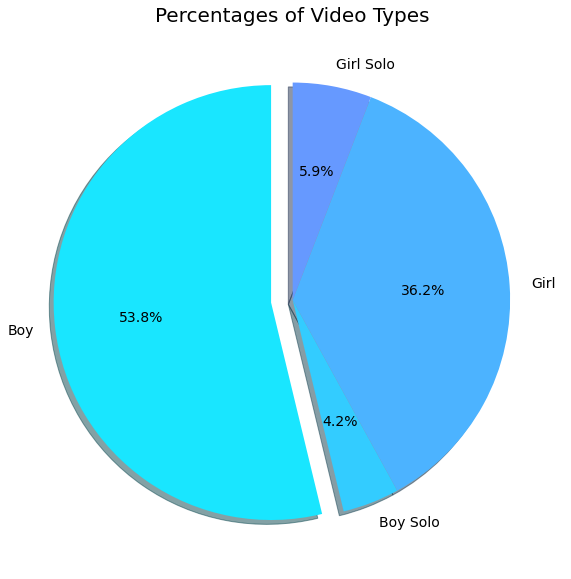

In [434]:
# visualization 1: Pie chart with percentages of video type (just videos)
count_type_list = []
video_type_list = []

# getting the video type and the count of the type from the database, grouping by type for aggregation
for video_type, count in cursor.execute("SELECT Type, COUNT(Type) AS count FROM final GROUP BY Type"):
    count_type_list.append(count)
    video_type_list.append(video_type)
    
# for fancy exploding pie chart

explode = (0.1,0 , 0, 0)

plt.figure(figsize=(15,10));
plt.pie(count_type_list, labels = video_type_list, autopct='%1.1f%%', colors = colors, textprops={'fontsize': 14},
        explode=explode, shadow=True, startangle=90)
plt.title('Percentages of Video Types', fontsize = 20)
plt.show()

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Likes by Video Type')

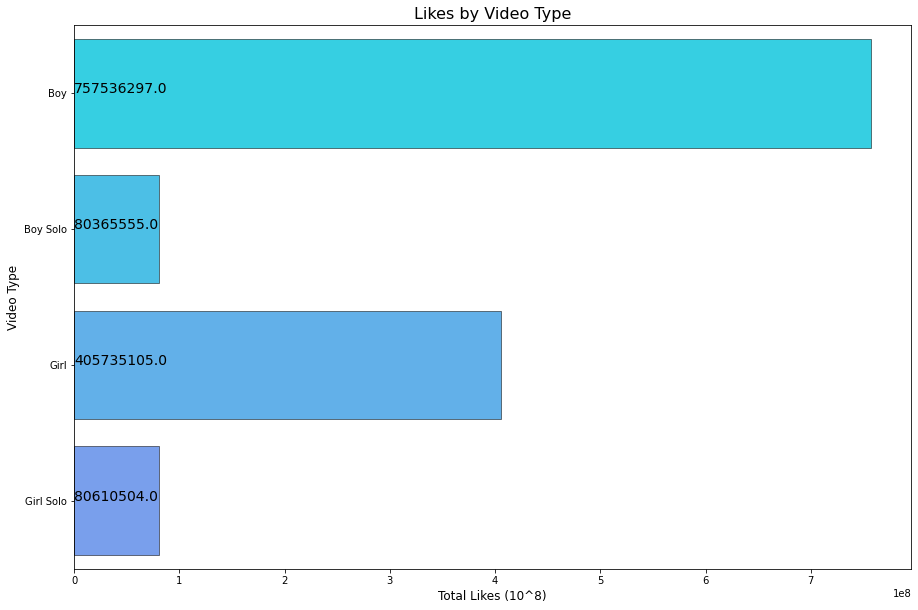

In [439]:
# visualization 2: bar graph YT likes by video type (boy solo, girl solo, girl, boy) (across dataframes videos and api)
video_type_list = []
likes_list = []

# getting video type and sum of YTLikes from the database, grouping by type
for video_type, totallikes in cursor.execute("SELECT Type, SUM(YTLikes) AS totallikes FROM final GROUP BY Type"):
    video_type_list.append(video_type)
    likes_list.append(totallikes)

# barplot 
a = plt.cm.cool
plt.figure(figsize=(15,10))

sns.barplot(likes_list, video_type_list, palette=[a(0.1),a(0.2),a(0.3), a(0.4)], edgecolor='black', linewidth=0.5)

for i, v in enumerate(likes_list):
    plt.text(0.8,i,v,color='k',fontsize=14)

plt.xlabel('Total Likes (10^8)', fontsize=12)
plt.ylabel('Video Type', fontsize=12)
plt.title("Likes by Video Type", fontsize=16)

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Views by Video Type')

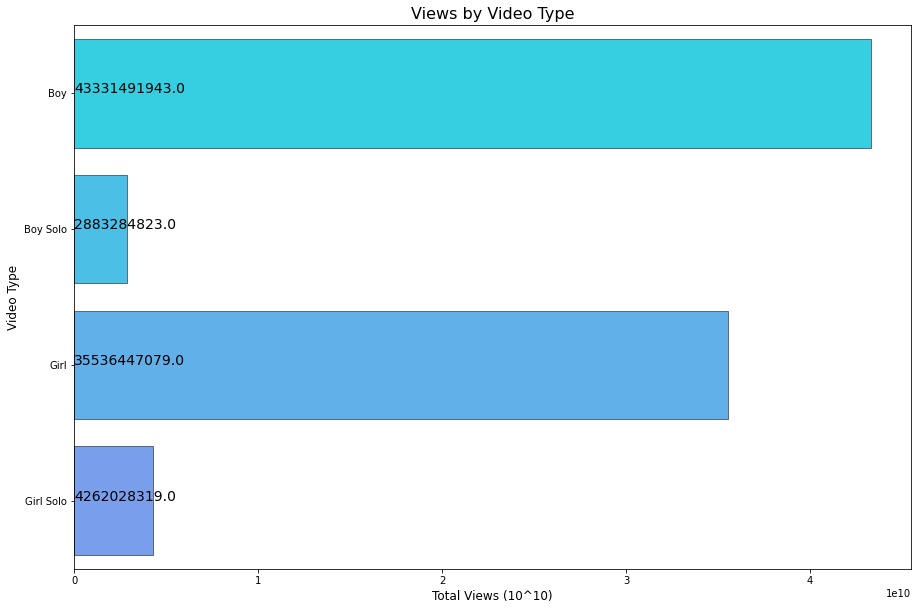

In [438]:
# visualization 3: bar graph YT views by video type (boy solo, girl solo, girl, boy) (across dataframes videos and api)
video_type_list = []
views_list = []

# getting video type and sum of views from the database, grouping by type
for video_type, totalviews in cursor.execute("SELECT Type, SUM(Views) AS totalviews FROM final GROUP BY Type"):
    video_type_list.append(video_type)
    views_list.append(totalviews)

# barplot
a = plt.cm.cool
plt.figure(figsize=(15,10))

sns.barplot(views_list, video_type_list, palette=[a(0.1),a(0.2),a(0.3), a(0.4)], edgecolor='black', linewidth=0.5)

for i, v in enumerate(views_list):
    plt.text(0.8,i,v,color='k',fontsize=14)

plt.xlabel('Total Views (10^10)', fontsize=12)
plt.ylabel('Video Type', fontsize=12)
plt.title("Views by Video Type", fontsize=16)

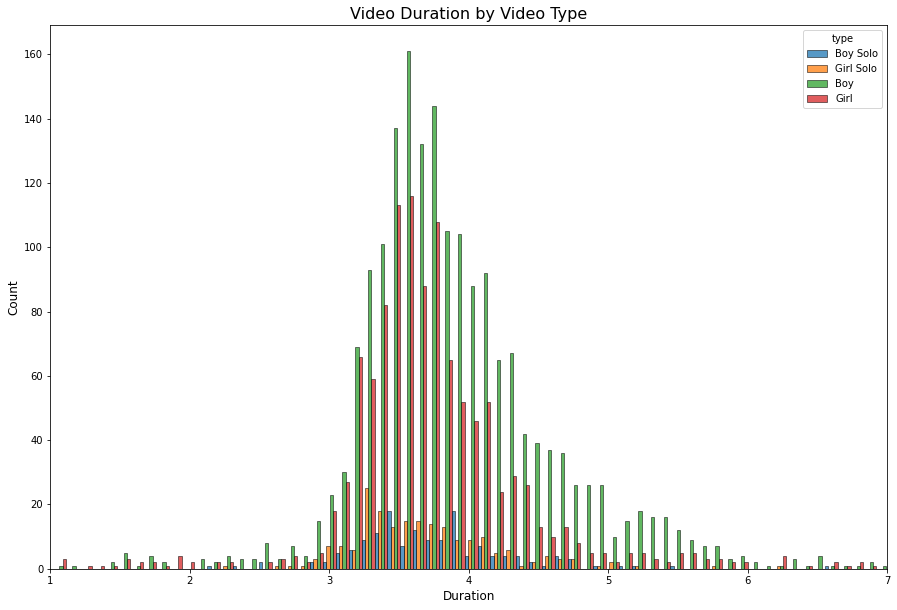

In [440]:
# visualization 4: histograms of time per video by video type (across dataframes videos and api)
video_type_list = []
duration_list = []

# getting the type and duration from the database
for video_type, time_dec in cursor.execute("SELECT Type, time_dec FROM final"):
    video_type_list.append(video_type)
    duration_list.append(time_dec)

# zipping the lists into a dataframe for easy access
type_duration_df = pd.DataFrame(list(zip(video_type_list, duration_list)), columns = ['type', 'duration'])

colors = [a(0.1),a(0.2),a(0.3), a(0.4)]
plt.figure(figsize=(15,10));
sns.histplot(data=type_duration_df, x="duration", hue="type", multiple="dodge", hue_order = ['Boy Solo', 'Girl Solo', 'Boy', 'Girl'],
             edgecolor='black', linewidth=0.5)

plt.xlabel('Duration', fontsize=12); plt.ylabel('Count', fontsize=12); 
plt.xlim(1,7); plt.title('Video Duration by Video Type', fontsize=16)
plt.show()

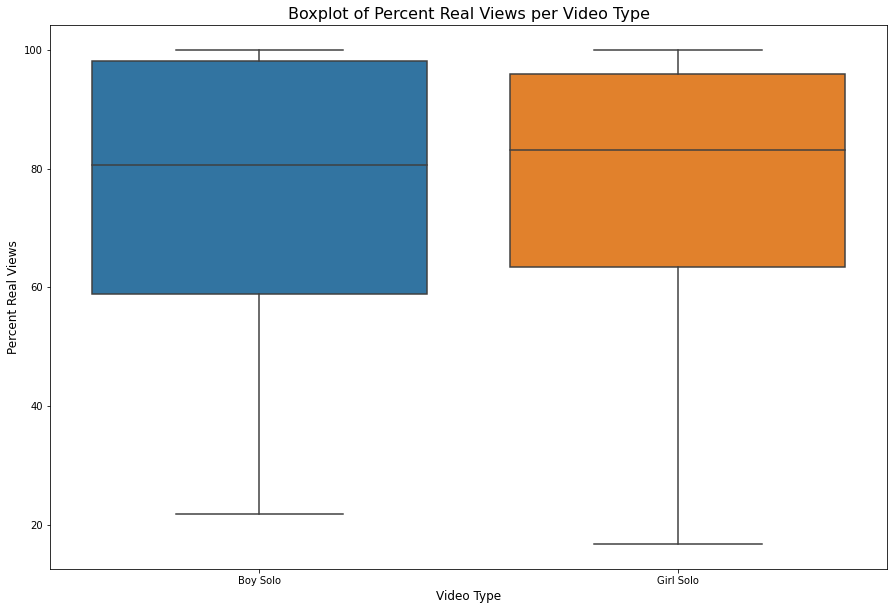

In [418]:
# visualization 5: boxplots of percentages real views by video type (across api and videos)
video_type_list = []
percentages_list = []
for video_type, totalviews in cursor.execute("SELECT Type, PercentRealViews FROM final"):
    video_type_list.append(video_type)
    percentages_list.append(totalviews)
    
percentages_list = [i for i in percentages_list if i is not None]
type_percentages_df = pd.DataFrame(list(zip(video_type_list, percentages_list)), columns = ['type', 'percent'])
plt.figure(figsize=(15, 10))
sns.boxplot(x='type', y='percent', data=type_percentages_df)
plt.xlabel("Video Type",fontsize=12)
plt.ylabel("Percent Real Views",fontsize=12)
plt.title("Boxplot of Percent Real Views per Video Type", fontsize=16)
plt.show()

**Conclusion:** What did you learn and a summary of ethical implications?

**Overall SQL and Visualization Thoughts**
I had some issues merging the tables in SQL because I had to strip the column names. Somehow, some of them had whitespace in the front or something. Anyways, other than that, creating the database file and then querying was actually pretty easy because refamiliarized myself with SQL and the dialect. I think most of the visualizations are self-explainanatory except perhaps the last one, where only two types of videos are shown. This is most likely due to the fact that the website I used only had information for a certain time period, and so it was likely that there weren't many group songs in that particular period up until now. I think the website worked past 2021 and my music videos file went up to around mid 2020. The histogram of video duration peaks around 3-4 minutes because although the songs are 2-3 minutes long, most companies decide to add stories to add to the hype for the video releases.

**Ethical Implications**
Continuing on what I talked about before, I don't really see any ethical implications with cleaning data here. As a summary:
1. I took out co-ed groups. I don't have an issue with co-ed groups, it's just that in this particular dataset, there isn't a lot of information to add to co-ed groups or special groups that could help with visualization or data analysis.
2.  opinions of kpop fans against the idea of finding negative information about their favorite groups
3. Using Youtube API doesn't have any implications because all the information is public and free use, and if the information wasn't available, I filled those values with empty
These aren't dangerous, but are something to think about with each step of data collection.

**Project Conclusion**
Overall, I had a lot of fun collecting data from different sources and then combining into one dataframe in SQL. There were definitely some issues here and there. The API collecting from YouTube was easy once I understood the method, but having a limit on queries led to several difficulties accumulating data when there was issues in the data. I had to create about 3 projects before I got it completely right. The transformations fared a bit better, so there weren't much issues there because we have had a lot of practice in the assignments. I didn't visualize anything about the inorganic views, but I found there were a lot of videos past 2021 where they have large amounts of botted views, up to almost 50% of the views. The lower bounds usually started at around a million, and the upper bounds went up to around 20 M on one of the videos. I'm not sure the reasons for botting, other than to advertise to a wider audience. Maybe in a future project, I could look into predicting whether videos are botted by group, director, company, etc. 